In [21]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
x_train[0].shape

(28, 28)

In [10]:
y_train[169]

0

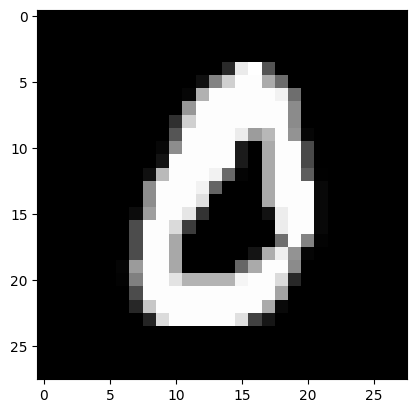

In [11]:
plt.imshow(x_train[169], cmap="gray")
plt.show()

### Preparing the dataset

In [17]:
x_train_flat = x_train.reshape((60000,28*28))
x_test_flat = x_test.reshape((10000,28*28))

In [29]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [30]:
print(x_train_flat.shape)
print(y_train_ohe.shape)
print(x_test_flat.shape)
print(y_test_ohe.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


## Model Building

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adadelta

In [98]:
model = Sequential()
model.add(Input(shape=(784)))
model.add(Dropout(0.25))
model.add(Dense(300, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [80]:
(784*300 + 300) + (300*10 + 10)

238510

In [99]:
model.compile(optimizer = Adadelta(learning_rate=0.1), loss = "categorical_crossentropy", metrics = "accuracy")

In [100]:
# Step 3: Model Fit
model.fit(x=x_train_flat, y=y_train_ohe, batch_size = 1000, 
          epochs=75, validation_data = (x_test_flat, y_test_ohe))

Epoch 1/75
60/60 [==============================] - 1s 16ms/step - loss: 49.5642 - accuracy: 0.4526 - val_loss: 10.9895 - val_accuracy: 0.7874
Epoch 2/75
60/60 [==============================] - 1s 14ms/step - loss: 17.7749 - accuracy: 0.7156 - val_loss: 6.8939 - val_accuracy: 0.8671
Epoch 3/75
60/60 [==============================] - 1s 15ms/step - loss: 12.2842 - accuracy: 0.7864 - val_loss: 5.5168 - val_accuracy: 0.8938
Epoch 4/75
60/60 [==============================] - 1s 15ms/step - loss: 9.4223 - accuracy: 0.8260 - val_loss: 4.4559 - val_accuracy: 0.9097
Epoch 5/75
60/60 [==============================] - 1s 15ms/step - loss: 7.6824 - accuracy: 0.8467 - val_loss: 3.7698 - val_accuracy: 0.9204
Epoch 6/75
60/60 [==============================] - 1s 15ms/step - loss: 6.5249 - accuracy: 0.8645 - val_loss: 3.2989 - val_accuracy: 0.9266
Epoch 7/75
60/60 [==============================] - 1s 17ms/step - loss: 5.6468 - accuracy: 0.8739 - val_loss: 2.8602 - val_accuracy: 0.9331
Epoch 8/7

Epoch 59/75
60/60 [==============================] - 1s 15ms/step - loss: 0.6150 - accuracy: 0.9651 - val_loss: 0.6095 - val_accuracy: 0.9722
Epoch 60/75
60/60 [==============================] - 1s 15ms/step - loss: 0.5633 - accuracy: 0.9655 - val_loss: 0.6214 - val_accuracy: 0.9718
Epoch 61/75
60/60 [==============================] - 1s 15ms/step - loss: 0.5997 - accuracy: 0.9655 - val_loss: 0.5504 - val_accuracy: 0.9753
Epoch 62/75
60/60 [==============================] - 1s 14ms/step - loss: 0.5681 - accuracy: 0.9658 - val_loss: 0.5814 - val_accuracy: 0.9735
Epoch 63/75
60/60 [==============================] - 1s 15ms/step - loss: 0.5733 - accuracy: 0.9672 - val_loss: 0.5425 - val_accuracy: 0.9739
Epoch 64/75
60/60 [==============================] - 1s 14ms/step - loss: 0.5865 - accuracy: 0.9661 - val_loss: 0.5705 - val_accuracy: 0.9745
Epoch 65/75
60/60 [==============================] - 1s 14ms/step - loss: 0.5529 - accuracy: 0.9672 - val_loss: 0.5451 - val_accuracy: 0.9756
Epoch 

In [101]:
hist = model.history.history

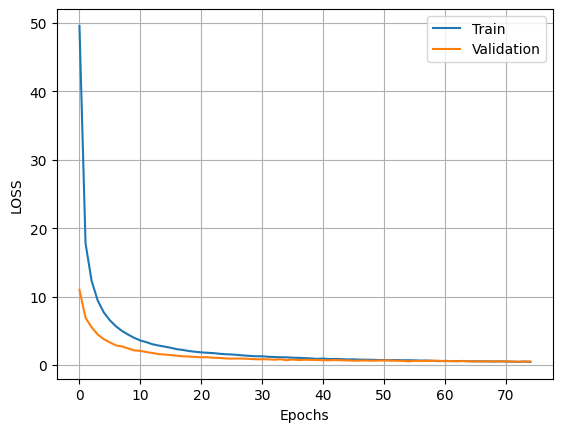

In [102]:
train_loss = hist["loss"]
val_loss = hist['val_loss']

plt.plot(train_loss)
plt.plot(val_loss)
# plt.ylim(20,120)
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend(["Train", "Validation"])
plt.grid()
plt.show()

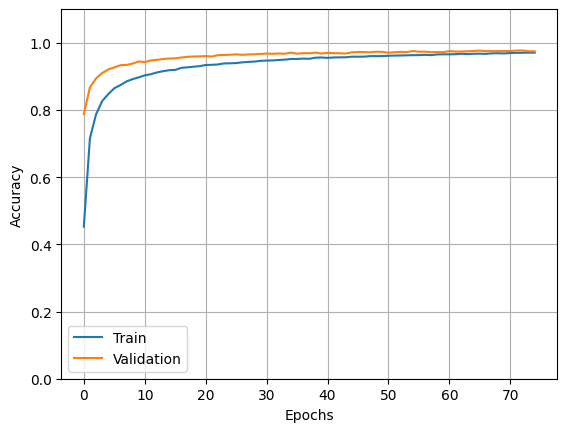

In [103]:
train_accuracy = hist["accuracy"]
val_accuracy = hist['val_accuracy']

plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.ylim(0,1.1)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.grid()
plt.show()

In [81]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


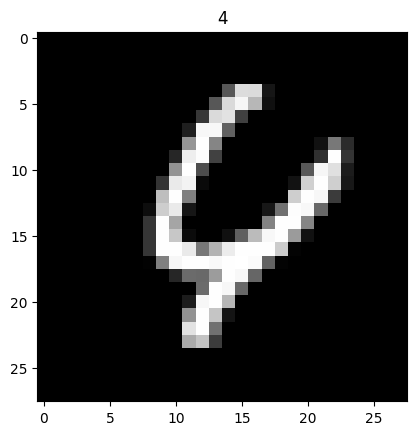

In [94]:
plt.imshow(x_test[121], cmap="gray")
plt.title(y_test[121])
plt.show()

In [91]:
import numpy as np

In [95]:
model.predict(x_test_flat)[121]

array([3.9073250e-32, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 2.5849739e-21, 2.6104045e-26,
       1.5004209e-24, 0.0000000e+00], dtype=float32)

In [96]:
np.argmax(model.predict(x_test_flat)[121])

4